In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston-house-prices/housing.csv


I will be using a Decision Tree Regression Algorithm to model on this dataset. I will predict the median value of the house based on the other features given in the Housing Prices Dataset.

## Importing Required Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Importing the Dataset

In [3]:
dataset = pd.read_csv("/kaggle/input/boston-house-prices/housing.csv", delim_whitespace = True, header = None)

## Visualising the Data

In [4]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
column_names = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [6]:
dataset.columns = column_names

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
updated_column_names = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'LSTAT', 'MEDV']

In [9]:
mean_data = []
for i in updated_column_names:
    mean_data.append(np.ceil(np.mean(dataset[str(i)])))

In [10]:
stdev_data = []
for i in updated_column_names:
    stdev_data.append(np.ceil(np.std(dataset[str(i)])))

In [11]:
mean_data

[4.0, 12.0, 12.0, 1.0, 1.0, 7.0, 69.0, 4.0, 10.0, 19.0, 13.0, 23.0]

In [12]:
stdev_data

[9.0, 24.0, 7.0, 1.0, 1.0, 1.0, 29.0, 3.0, 9.0, 3.0, 8.0, 10.0]

## Data Visualisation

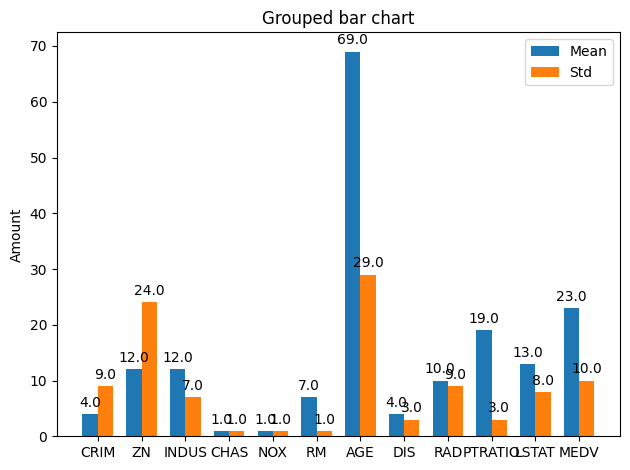

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = updated_column_names
mean_data;
stdev_data;

x = np.arange(len(labels))
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mean_data, width, label='Mean')
rects2 = ax.bar(x + width/2, stdev_data, width, label='Std')


ax.set_ylabel('Amount')
ax.set_title('Grouped bar chart')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

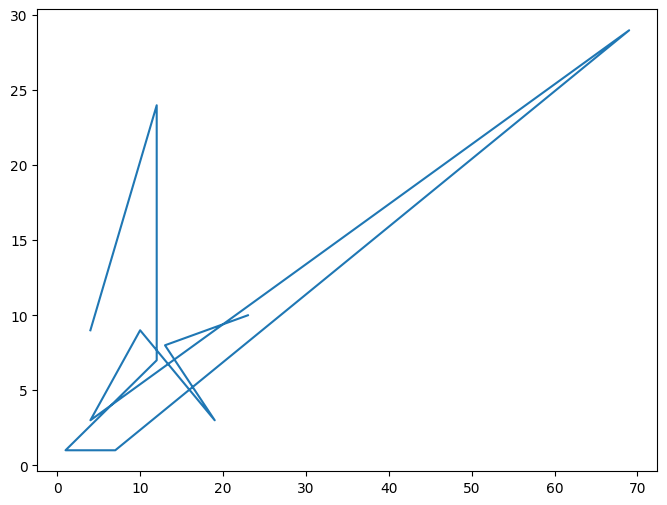

In [14]:
plt.figure(figsize = (8,6))
plt.plot(mean_data, stdev_data)
plt.show()

### Horizontal Bar Chart

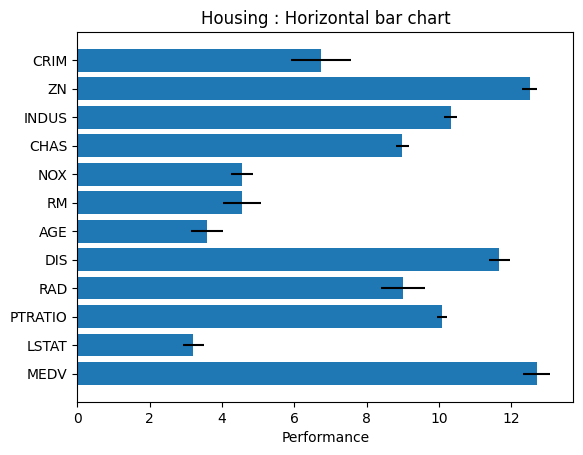

In [15]:
np.random.seed(42)

plt.rcdefaults()
fig, ax = plt.subplots()

labels = updated_column_names
y_pos = np.arange(len(labels))
performance = 3 + 10 * np.random.rand(len(labels))
error = np.random.rand(len(labels))

ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Housing : Horizontal bar chart')

plt.show()

### Pie Chart

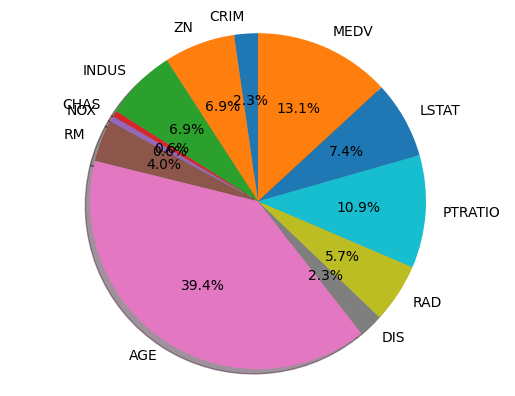

In [16]:
labels = updated_column_names
sizes = mean_data

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio (pie is a circle)

plt.show()

In [17]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [18]:
# Feature matrix
X[:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [19]:
# Dependent Variable Vector
y[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [20]:
(X.shape, y.shape)

((506, 13), (506,))

## Split the data into training and test sets

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [22]:
(X_train.shape, X_test.shape)

((404, 13), (102, 13))

In [23]:
(y_train.shape, y_test.shape)

((404,), (102,))

## Training a Decision Tree Regression Model on the Dataset

In [24]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

## Evaluating the Decision Tree Regression model

In [25]:
regressor.predict([[0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98]])

array([35.1])

In [26]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
y_true = y_test
y_pred = regressor.predict(X_test)

In [27]:
mean_squared_error(y_true, y_pred)

20.951176470588234

In [28]:
# root mean squared error
mean_squared_error(y_test, y_pred, squared = False)

4.577245511286043

In [29]:
# Mean absolute error
mean_absolute_error(y_true, y_pred)

2.788235294117648

In [30]:
# R^2 score
r2_score(y_true, y_pred)

0.740947635234286

## Training a Random Forest Regression model on the dataset

In [31]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10)

## Evaluating the Random Forest Regression model

In [32]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
y_true = y_test
y_pred = regressor.predict(X_test)

In [33]:
mean_squared_error(y_true, y_pred)

19.509719607843135

In [34]:
mean_squared_error(y_true, y_pred, squared = False)

4.416980824934962

In [35]:
mean_absolute_error(y_true, y_pred)

2.5201960784313724

In [36]:
r2_score(y_true, y_pred)

0.7587706347935752

Overall, the Random Forest Regressor outperforms the Decision Tree Regressor by a significant margin.